In [1]:
%run C:/Users/cosmosyw/Documents/Softwares/MeCP2_analysis_2/Startup.py

PID number is 23800


Data of [MeCP2_ChIP](../../resources/GSE71126_MeCP2_ChiP_signal_4Mb.csv) below is in the repository

In [20]:
file_name = r"C:\Users\cosmosyw\Documents\Research\Mecp2_v2\results\ChiP_results\GSE71126_MeCP2_ChiP_signal_4Mb.csv"

df_mecp2 = pd.read_csv(file_name, index_col=0)
df_mecp2

,chr,start,end,Input_count,MeCP2_count,corresponding_loci,MeCP2_signal,loci_name
0,chr1,1000001,5000000,877755.0,866459.0,chr1_3742742_3759944,-0.018687,chr1_1000001_5000000
1,chr1,4000001,8000000,1634519.0,1732543.0,chr1_6245958_6258969,0.084025,chr1_4000001_8000000
2,chr1,6000001,10000000,1532815.0,1677159.0,chr1_8740008_8759916,0.129836,chr1_6000001_10000000
3,chr1,7000001,11000000,1537072.0,1756953.0,chr1_9627926_9637875,0.192891,chr1_7000001_11000000
4,chr1,7000001,11000000,1537072.0,1756953.0,chr1_9799472_9811359,0.192891,chr1_7000001_11000000
...,...,...,...,...,...,...,...,...
1977,chrX,164000001,168000000,575071.0,484149.0,chrX_166247682_166259932,-0.248289,chrX_164000001_168000000
1978,chrX,165000001,169000000,580456.0,434359.0,chrX_167157164_167167452,-0.418299,chrX_165000001_169000000
1979,chrX,166000001,170000000,699182.0,895812.0,chrX_168746045_168757590,0.357528,chrX_166000001_170000000
1980,chrX,167000001,171000000,547254.0,773595.0,chrX_169963295_170005197,0.499368,chrX_167000001_171000000


# Plot

In [21]:
df_plot = df_mecp2[~df_mecp2.chr.isin(['chrX', 'chrY'])].copy(0)
df_plot['chr_num'] = df_plot['chr'].apply(lambda x: int(x.split('chr')[-1]))
df_plot.sort_values(['chr_num', 'start'], inplace=True)
df_plot

,chr,start,end,Input_count,MeCP2_count,corresponding_loci,MeCP2_signal,loci_name,chr_num
0,chr1,1000001,5000000,877755.0,866459.0,chr1_3742742_3759944,-0.018687,chr1_1000001_5000000,1
1,chr1,4000001,8000000,1634519.0,1732543.0,chr1_6245958_6258969,0.084025,chr1_4000001_8000000,1
2,chr1,6000001,10000000,1532815.0,1677159.0,chr1_8740008_8759916,0.129836,chr1_6000001_10000000,1
3,chr1,7000001,11000000,1537072.0,1756953.0,chr1_9627926_9637875,0.192891,chr1_7000001_11000000,1
4,chr1,7000001,11000000,1537072.0,1756953.0,chr1_9799472_9811359,0.192891,chr1_7000001_11000000,1
...,...,...,...,...,...,...,...,...,...
986,chr19,56000001,60000000,2009397.0,9540227.0,chr19_58748508_58759979,2.247261,chr19_56000001_60000000,19
987,chr19,56000001,60000000,2009397.0,9540227.0,chr19_58830419_58839344,2.247261,chr19_56000001_60000000,19
988,chr19,57000001,61000000,1988620.0,6816183.0,chr19_59036844_59050456,1.777196,chr19_57000001_61000000,19
989,chr19,57000001,61000000,1988620.0,6816183.0,chr19_59406809_59416471,1.777196,chr19_57000001_61000000,19


In [22]:
mean_signal = np.mean(df_plot['MeCP2_signal'])
std_signal = np.std(df_plot['MeCP2_signal'])

df_plot['z_score'] = (df_plot['MeCP2_signal']-mean_signal)/std_signal

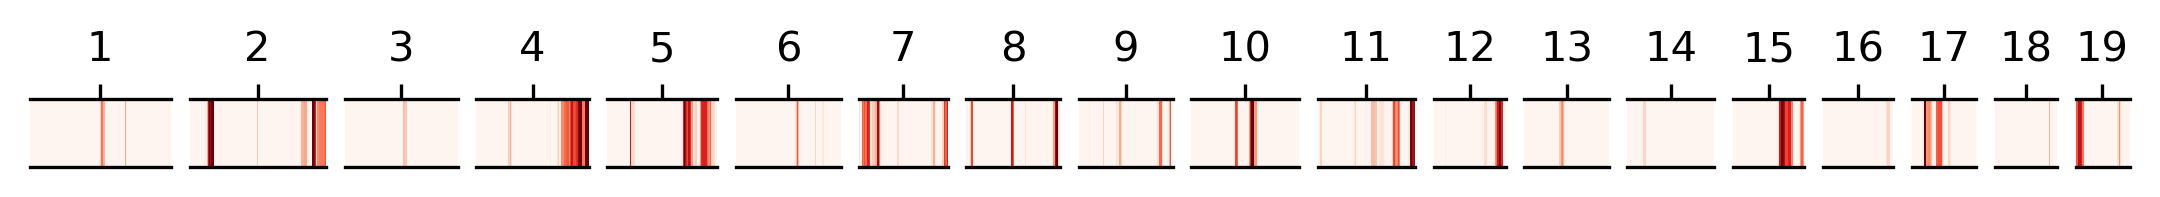

In [23]:
fig = plt.figure(figsize=(10,0.3), dpi=300)

gs = fig.add_gridspec(nrows=1, ncols=len(df_plot)+360, left=0.05, right=0.75,
                      hspace=0.1)

plotted_chr = 0
plot_col_tracker = 0
for chr_num, df_chr in df_plot.groupby('chr_num'):
    if chr_num==plotted_chr+1:
        plotted_chr+=1 # keep track of the chromosomes
        
        ax = fig.add_subplot(gs[0, plot_col_tracker:plot_col_tracker+len(df_chr)])
        plot_col_tracker += len(df_chr)+20
        
        sns.heatmap(df_chr['z_score'].values.reshape(1, len(df_chr)), vmin=1, vmax=2, cmap='Reds', center=1.5,
                   xticklabels=False, yticklabels=False, cbar=False)

        ax.set_xticks([int(len(df_chr)/2)],[chr_num])
        ax.tick_params(axis='x', top=True, labeltop=True, bottom=False, labelbottom=False)
        ax.spines['top'].set_visible(True)
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(True)
plt.show()